In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [26]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=-0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

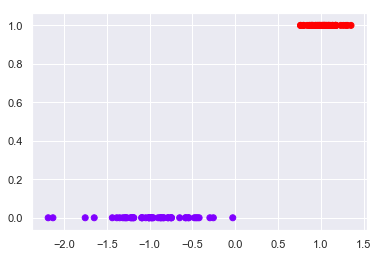

In [27]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow');

In [28]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [29]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[3.21533051]]
[-0.40336812]


In [8]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [9]:
y_pred = lr.predict(x_test)

In [10]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[13,  1],
       [ 2,  9]])

In [11]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.63383283, 0.36616717],
       [0.25246402, 0.74753598],
       [0.62065392, 0.37934608],
       [0.88938675, 0.11061325],
       [0.12413696, 0.87586304],
       [0.92761042, 0.07238958],
       [0.64528621, 0.35471379],
       [0.86547614, 0.13452386],
       [0.01414934, 0.98585066],
       [0.97342998, 0.02657002],
       [0.85470302, 0.14529698],
       [0.16495366, 0.83504634],
       [0.04540035, 0.95459965],
       [0.74881887, 0.25118113],
       [0.61115974, 0.38884026],
       [0.45648998, 0.54351002],
       [0.96305873, 0.03694127],
       [0.8895611 , 0.1104389 ],
       [0.36727982, 0.63272018],
       [0.09560943, 0.90439057],
       [0.96560769, 0.03439231],
       [0.97493585, 0.02506415],
       [0.0040503 , 0.9959497 ],
       [0.72890333, 0.27109667],
       [0.43455178, 0.56544822]])

In [12]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

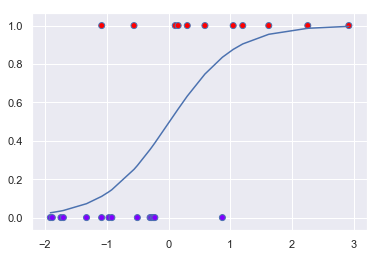

In [13]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b');

In [14]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.88


![title](pic.png)